## Class Exercise 1

1. Create a class called `Person` which has the following characteristics
    - Input variables which set the person's age and name
    - A function returns the person's age categorization with the following condtionals:
        - < 1 = infant
        - < 11 = child
        - < 18 = teenager
        - otherwise: adult
    - Write a function which updates the name
    - Write a function called `birthday` which increases the person's age by `1` and returns the new age

Create an instance of your class and test all your functions

## Class Exercise 2

2. Create a class called `Student` which inherits from `Person` and has the following characteristics
    - Input variables which set the student's major and university name
    - A function returns a desciption of the student
        - Their name, age, major and university

**Aside**: String formatting
- String formatting is super simple in python. You can insert variables directly into strings using "f strings":
```
x = 10
y = 100
v = "hello"
new_str = f"{v} world x is equal to {x}, Y is equal to {y}"
```


## Class Exercise 3
3. Briefly describe a possible collection of classes which can be used to represent a music collection (for example, inside a music player), focusing on how they would be related by composition. You should include classes for songs, artists, albums and playlists. Hint: write down the four class names, draw a line between each pair of classes which you think should have a relationship, and decide what kind of relationship would be the most appropriate.
For simplicity you can assume that any song or album has a single “artist” value (which could represent more than one person), but you should include compilation albums (which contain songs by a selection of different artists). The “artist” of a compilation album can be a special value like “Various Artists”. You can also assume that each song is associated with a single album, but that multiple copies of the same song (which are included in different albums) can exist.

4. Write a simple implementation of this model which clearly shows how the different classes are composed. Write some example code to show how you would use your classes to create an album and add all its songs to a playlist. Hint: if two objects are related to each other bidirectionally, you will have to decide how this link should be formed – one of the objects will have to be created before the other, so you can’t link them to each other in both directions simultaneously!

The following relationships should exist between the four classes:

*  a one-to-many relationship between albums and songs – this is likely to be 
bidirectional, since songs and albums are quite closely coupled.

*  a one-to-many relationship between artists and songs. This can be unidirectional or bidirectional. We don’t really need to store links to all of an artist’s songs on an artist object, since a reference to the artist from each song is enough for us to search our songs by artist, but if the music collection is very large it may be a good idea to cache this list.

*  a one-to-many relationship between artists and albums, which can be unidirectional or bidirectional for the same reasons.

*  a one-to-many relationship between playlists and songs – this is likely to be unidirectional, since it’s uncommon to keep track of all the playlists on which a particular song appears.

In [1]:
class Song:

    def __init__(self, title, artist, album, track_number):
        self.title = title
        self.artist = artist
        self.album = album
        self.track_number = track_number

        artist.add_song(self)


class Album:

    def __init__(self, title, artist, year):
        self.title = title
        self.artist = artist
        self.year = year

        self.tracks = []

        artist.add_album(self)

    def add_track(self, title, artist=None):
        if artist is None:
            artist = self.artist

        track_number = len(self.tracks)

        song = Song(title, artist, self, track_number)

        self.tracks.append(song)


class Artist:
    def __init__(self, name):
        self.name = name

        self.albums = []
        self.songs = []

    def add_album(self, album):
        self.albums.append(album)

    def add_song(self, song):
        self.songs.append(song)


class Playlist:
    def __init__(self, name):
        self.name = name
        self.songs = []

    def add_song(self, song):
        self.songs.append(song)

band = Artist("Bob's Awesome Band")
album = Album("Bob's First Single", band, 2013)
album.add_track("A Ballad about Cheese")
album.add_track("A Ballad about Cheese (dance remix)")
album.add_track("A Third Song to Use Up the Rest of the Space")

playlist = Playlist("My Favourite Songs")

for song in album.tracks:
    playlist.add_song(song)

## Calling system commands

One great feature that jupyter provides is being able to make calls to the underlying system. We do this using the `!` operator at the beginning of a command

In [2]:
# getting the current directory
!pwd
# touching a file
!touch test_file
# listing the contents
!ls

/content
sample_data  test_file


If you're familiar with bash syntax then you can take advantage of these commands to seamlessly integrate bash and python

In [3]:
# create variable in python
value = 'hello world'
# use variable in bash
!echo $value

## This also works the other way
current_dir = !pwd
print(current_dir)

hello world
['/content']


## Useful bash commands
Some basic, but useful, commands you will see in this class mostly revolve around file management.

Let's say I want to download an image, I can use `wget`

In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a5/Compound_Microscope_%28cropped%29.JPG

--2023-02-12 16:49:59--  https://upload.wikimedia.org/wikipedia/commons/a/a5/Compound_Microscope_%28cropped%29.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3188281 (3.0M) [image/jpeg]
Saving to: ‘Compound_Microscope_(cropped).JPG’

Compound_Microscope 100%[===================>]   3.04M  --.-KB/s    in 0.1s    

2023-02-12 16:50:00 (29.0 MB/s) - ‘Compound_Microscope_(cropped).JPG’ saved [3188281/3188281]



Or if I want to unzip a file

In [5]:
!wget https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-zip-file.zip
!unzip sample-zip-file.zip

--2023-02-12 16:50:00--  https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-zip-file.zip
Resolving www.learningcontainer.com (www.learningcontainer.com)... 104.21.84.74, 172.67.188.164, 2606:4700:3037::6815:544a, ...
Connecting to www.learningcontainer.com (www.learningcontainer.com)|104.21.84.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380 [application/zip]
Saving to: ‘sample-zip-file.zip’

sample-zip-file.zip 100%[===================>]     380  --.-KB/s    in 0s      

2023-02-12 16:50:00 (8.74 MB/s) - ‘sample-zip-file.zip’ saved [380/380]

Archive:  sample-zip-file.zip
  inflating: sample.txt              


In [6]:
!ls

'Compound_Microscope_(cropped).JPG'   sample.txt	    test_file
 sample_data			      sample-zip-file.zip


## Class Exercise 4
1. Download a random image from the internet using wget
2. Load that image using the library of your choice
3. Display the image using matplotlib
4. Create a 256x256 version of the image (find and use the resize function in your library)
5. Display the resized image

In [7]:
# importing the input/output module from scikit-image
import skimage.io

# reading image
image = skimage.io.imread('Compound_Microscope_(cropped).JPG')
# showing image shape
image.shape

(3496, 2445, 3)

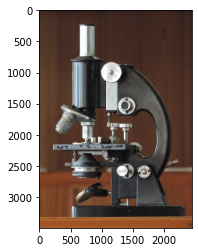

In [8]:
# we can use matplotlib to display images
import matplotlib.pyplot as plt
plt.imshow(image)

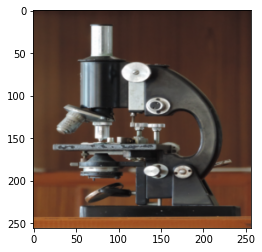

In [9]:
from skimage.transform import resize

im_resized = resize(image, (256, 256, 3))
plt.imshow(im_resized)

Resource for OpenCV: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

Resource for Scikit-Image: https://scikit-image.org/docs/stable/user_guide.html